Sample 1:
Features:
[229 148 167 ... 215 147 153]
Label: 4

Sample 2:
Features:
[159 105 143 ... 172 118 153]
Label: 4

Sample 3:
Features:
[10  5  8 ... 73 49 64]
Label: 4

Sample 4:
Features:
[150 137 132 ... 120 105  98]
Label: 2

Sample 5:
Features:
[131 119 140 ... 143 131 142]
Label: 2

Training Error: 0.3301


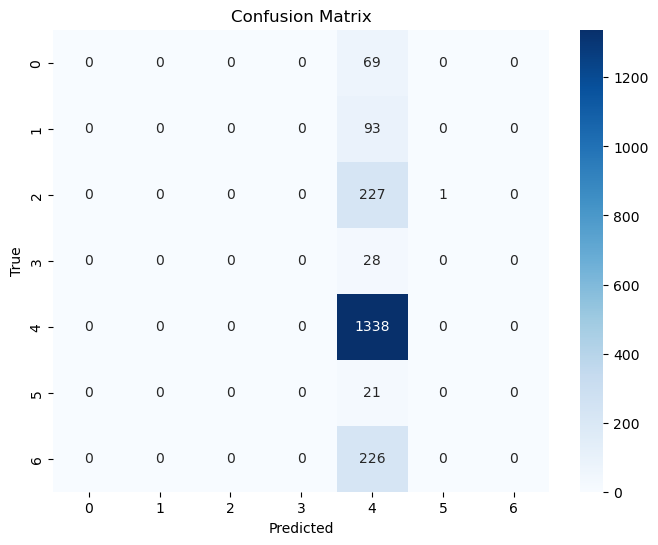

Accuracy: 0.6680
Precision: 0.4464
Recall: 0.6680
F1-Score: 0.5352


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directories for CSV data
data_dir = 'D:/cannon'  # Update with your dataset directory
file_extension = '.csv'

# Task 1: Read all data and divide into training and testing sets
def load_and_split_data(data_dir, test_size=0.2, random_state=42):
    X, y = [], []

    for file_name in os.listdir(data_dir):
        if file_name.endswith(file_extension):
            file_path = os.path.join(data_dir, file_name)
            df = pd.read_csv(file_path)

            if df.isnull().values.any():
                df.fillna(0, inplace=True)

            X.extend(df.values[:, :-1])
            y.extend(df.values[:, -1])

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Task 2: Define a Function to Show N Training or Test Samples
def display_samples(X, y, n_samples):
    for i in range(n_samples):
        print(f"Sample {i + 1}:")
        print("Features:")
        print(X[i])
        print("Label:", y[i])
        print()

# Task 3: Define a Function to Create an MLP Architecture and Fit the Training Data
def create_and_train_mlp(X_train, y_train, hidden_layer_sizes=(100, 100), max_iter=1000):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
    mlp.fit(X_train, y_train)
    return mlp

# Task 4: Display Training Error
def display_training_error(mlp, X_train, y_train):
    training_error = 1 - mlp.score(X_train, y_train)
    print(f"Training Error: {training_error:.4f}")

# Task 5: Apply the Trained Model on Test Data
def apply_mlp_on_test_data(mlp, X_test):
    y_pred = mlp.predict(X_test)
    return y_pred

# Task 6: Display the Results as a Confusion Matrix
def display_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Task 7: Find Accuracy on Test Data using Precision, Recall, and F-Measure
def calculate_metrics(y_true, y_pred, class_labels):
    classification_rep = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    metrics = {
        'accuracy': classification_rep['accuracy'],
        'precision': classification_rep['weighted avg']['precision'],
        'recall': classification_rep['weighted avg']['recall'],
        'f1-score': classification_rep['weighted avg']['f1-score']
    }
    return metrics

# Example usage:
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_and_split_data(data_dir)
    class_labels = np.unique(y_train)

    display_samples(X_train, y_train, n_samples=5)

    mlp = create_and_train_mlp(X_train, y_train)
    display_training_error(mlp, X_train, y_train)

    y_pred = apply_mlp_on_test_data(mlp, X_test)
    display_confusion_matrix(y_test, y_pred, class_labels)

    metrics = calculate_metrics(y_test, y_pred, class_labels)
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")
